# Explore the reference network


- [Crossref](https://www.crossref.org/) provides an API to get the references of a publication ([rest-api-doc](https://github.com/CrossRef/rest-api-doc)).


- A first idea is to go down the references for a fixed number of steps (for example 3), then keep only the articles which have been visited more than N times (for examples 3 times), and draw the upward graph starting from these articles. 
- Second idea: to look a the top cited articles in the creates graph

## to do:

- stats:  n ref vs n citation, review vs foundational

- disconnected component for the 1st generation references: coloring 

### Knowledge reduction

- ne pas afficher les references, si au moins une des references l'utilise
- supprime un lien si un chemin plus long existe




In [165]:
%load_ext autoreload
%autoreload 2

import crossrefexp as exp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:

store = exp.MetaDataStore()

`data/cachefile.pickle` not found. A new file will be created.


In [138]:
store.reset()

Delete `data/cachefile.pickle` 0.00 Mo, 
 Are you sure? [type yes] yes
file removed


In [140]:
len(store)

0

In [141]:
metadata = store.get( '10.1063/1.3501021' )
metadata.printinfo()

(2010) Constitutive modeling of intrinsic and oxygen-contaminated silicon monocrys...
   J. Cochard et al. - Journal of Applied Physics
   http://dx.doi.org/10.1063/1.3501021


In [143]:
gr = exp.ReferenceGraph( '10.1063/1.3501021' )

In [144]:
gr

{'10.1063/1.3501021': {'citedBy': [], 'gen': 0}}

In [156]:
store.grow( gr, 1 )

- done -1171          7 metadata retrieved from Crossref in 0.465592 s.s. s.86 s.m Crossref in 0.473648 s.


In [159]:
len( gr ), len(store)

(1171, 169)

In [160]:
from graphviz import Digraph

In [161]:
def getlabel(doi):
    return store.get(doi).label()

color_list = ['red', 'gold1', 'cyan3', 'darkorchid2', 'chartreuse2']
def getcolor(doi):
    return color_list[ gr[doi]['gen'] ]

nodes, links = gr.upward_graph(4)

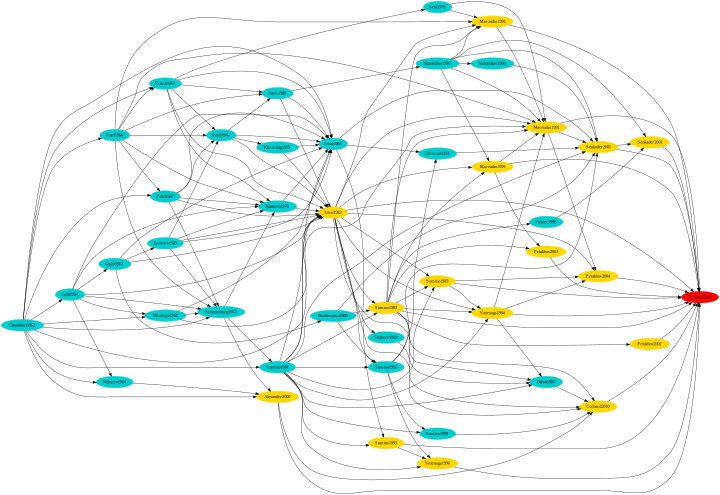

In [163]:
exp.built_graphviz( nodes, links, getlabel, getcolor )

In [162]:
for doi, citedby_count in gr.most_cited()[:10]:
    print( getlabel(doi), citedby_count, store.get(doi)['URL'])

Imai1983 12 http://dx.doi.org/10.1080/01418618308245248
Sumino1981 12 http://dx.doi.org/10.1080/01418618108235812
Chaudhuri1962 11 http://dx.doi.org/10.1063/1.1702540
Sumino1983 11 http://dx.doi.org/10.1080/01418618308245262
Alexander1969 10 http://dx.doi.org/10.1016/s0081-1947(08)60031-4
Kaiser1958 10 http://dx.doi.org/10.1103/physrev.112.1546
Sumino1980 9 http://dx.doi.org/10.1143/jjap.19.l49
Cottrell1949 8 http://dx.doi.org/10.1098/rspa.1949.0128
Johnston1959 8 http://dx.doi.org/10.1063/1.1735121
Patel1966 8 http://dx.doi.org/10.1103/physrev.143.601
